# Tumor Invasion Dataset Visualization

This Jupyter Notebook is used to visualize tumor spheroid invasion assay images and their corresponding segmentation masks.  
The annotations are loaded from a COCO-formatted dataset, and the masks are overlaid onto the original images for inspection.  

### **Functionality:**
- Loads the dataset annotations from a COCO JSON file.
- Retrieves and displays individual images from the dataset.
- Overlays segmentation masks onto images to visualize invasion areas.

This script helps verify that the dataset is correctly formatted before training a deep learning model.

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
/Users/ellielin/Desktop/stik_gui/C3_jpg/11042024_CG_49koseries_invasionassay 49 and 188 m4k4 ko_Sequence 001_C_3_Mosaic001_Merged_t00_ch00.jpeg


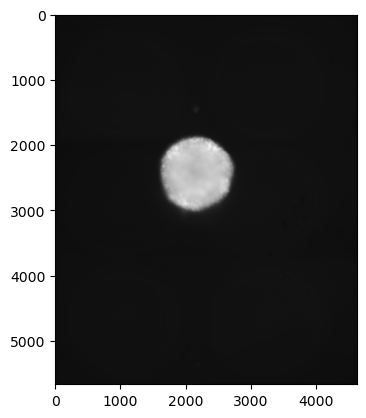

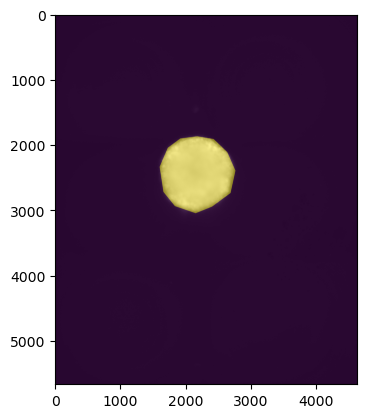

In [6]:
# conda install -c conda-forge opencv
# conda install pytorch torchvision torchaudio cpuonly -c pytorch
# conda install -c conda-forge pycocotools

import json
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import numpy as np
import cv2
from pathlib import Path

# set up the path to the COCO-formatted annotation file 
annotation_file = Path("/Users/ellielin/Desktop/stik_gui/annotations/instances_default.json")
image_dir = Path("/Users/ellielin/Desktop/stik_gui/C3_jpg")

# load and display categories (invasion area)
coco = COCO(annotation_file);
image_ids = coco.getImgIds()

# process all images
for image_id in image_ids:
    image_info = coco.loadImgs(image_id)[0]
    image_filename = image_info['file_name']
    image_path = image_dir / image_filename
    
    image = cv2.imread(str(image_path))
    
    ann_ids = coco.getAnnIds(imgIds=image_id)
    annotations = coco.loadAnns(ann_ids)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    for ann in annotations:
        mask = coco.annToMask(ann)
        plt.imshow(mask, alpha=0.5) # overlay annotation mask
    
    plt.title(f"Image ID: {image_id}")
    plt.show()

# load categories defined in CVAT (invasion area)
categories = coco.loadCats(coco.getCatIds());
category_names = [category['name'] for category in categories]

# construct image path
image_ids = coco.getImgIds()
image_id = image_ids[0]
image_info = coco.loadImgs(image_id)[0]
image_filename = image_info['file_name']
image_path = Path("/Users/ellielin/Desktop/stik_gui/C3_jpg") / image_filename
print(image_path)

# load and display image
image = cv2.imread(str(image_path))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# load and visualize annotations (outlines of invasion area)
ann_ids = coco.getAnnIds(imgIds=image_id)
annotations = coco.loadAnns(ann_ids)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
for ann in annotations:
    mask = coco.annToMask(ann)
    plt.imshow(mask, alpha=0.5)
plt.show()